In [186]:
import pandas as pd
import numpy as np
%matplotlib inline
import os
import matplotlib.pyplot as plt
import calplot
from pandas.api.types import CategoricalDtype
import seaborn as sns
import plotly.express as px
import folium
import chardet
import geopandas as gpd
from geopandas.tools import geocode
import warnings
from geopy.geocoders import Nominatim

In [187]:
# Opening file

names = ["Dis No"]

#Natural_Disasters = pd.read_csv('NaturalDisastersv3.xlsx',names=names, lineterminator='\n', nrows=25882)
Natural_Disasters = pd.read_excel('NaturalDisasters.xlsx')

In [188]:
#there are also data for technological disasters so we are choosing Natural Disasters

Natural_Disasters = Natural_Disasters[Natural_Disasters['Disaster Group']=='Natural']

#there are some natural disasters that there are very few data
Natural_Disasters = Natural_Disasters[(Natural_Disasters['Disaster Subtype']!='Landslide')& (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')&(Natural_Disasters['Disaster Subtype']!='Lava flow')& (Natural_Disasters['Disaster Subtype']!='Rockfall')& (Natural_Disasters['Disaster Subtype']!='Grasshopper')& (Natural_Disasters['Disaster Subtype']!='Locust')& (Natural_Disasters['Disaster Subtype']!='Worms')& (Natural_Disasters['Disaster Subtype']!='Subsidence')
                    & (Natural_Disasters['Disaster Subtype']!='Ash fall')]
# print( pd.unique(Natural_Disasters['Disaster Subtype'].values))
# & (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')]



#cols=["year","month","day"]
#df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


In [189]:
Natural_Disasters.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [190]:
Natural_Disasters['Region'].unique()

array(['Western Africa', 'Southern Asia', 'Western Europe',
       'Eastern Asia', 'Caribbean', 'South-Eastern Asia',
       'Northern America', 'Northern Africa', 'Southern Europe',
       'Central America', 'Melanesia', 'Australia and New Zealand',
       'Polynesia', 'South America', 'Eastern Africa', 'Northern Europe',
       'Micronesia', 'Eastern Europe', 'Southern Africa', 'Western Asia',
       'Middle Africa', 'Russian Federation', 'Central Asia'],
      dtype=object)

In [191]:
ISO_to_Region = Natural_Disasters[['ISO','Region']].drop_duplicates(subset=['ISO', 'Region'])
ISO_to_Region = ISO_to_Region.set_index('ISO')['Region'].to_dict()
#ISO_to_Region

In [192]:
Disasters_Filtered = Natural_Disasters[(Natural_Disasters['Country']=='India')
                                      |(Natural_Disasters['Country']=='United States of America (the)')
                                      |(Natural_Disasters['ISO']=='RUS')
                                      |(Natural_Disasters['Country']=='Australia')
                                      |(Natural_Disasters['ISO']=='BRA')
                                      |(Natural_Disasters['ISO']=='CHN')
                                      |(Natural_Disasters['ISO']=='IDN')
                                      |(Natural_Disasters['ISO']=='MEX')]


#print( pd.unique(Disasters_Filtered['Country'].values))
#print( pd.unique(Natural_Disasters['Country'].values))


In [193]:
# Not a comment Disasters_Filtered

# Filtering disasters before and after 2000 

Disaster_Country_After_2000= Disasters_Filtered[(Disasters_Filtered['Year'] > 2000)&(Disasters_Filtered['Year'] < 2022)].groupby(['ISO','Disaster Subtype','Year'])['Dis No'].count().reset_index()
Disaster_Country_After_2000_pivoted = Disaster_Country_After_2000.pivot(index=['ISO','Year'], columns='Disaster Subtype', values = 'Dis No')

In [194]:
filtered = Disaster_Country_After_2000_pivoted.fillna(0)
filtered = filtered.reset_index()
filtered['Region'] = filtered['ISO'].map(ISO_to_Region)

In [195]:

Disaster_Region_After_2000= Disasters_Filtered[(Disasters_Filtered['Year'] > 2000)&(Disasters_Filtered['Year'] < 2023)].groupby(['Region','Disaster Subtype','Year'])['Dis No'].count().reset_index()
Disaster_Region_After_2000_pivoted = Disaster_Region_After_2000.pivot(index=['Region','Year'], columns='Disaster Subtype', values = 'Dis No')

In [196]:
Regions_filtered = Disaster_Region_After_2000_pivoted.reset_index()
Regions_filtered = Regions_filtered.fillna(0)
Regions_filtered = Regions_filtered.reset_index()

In [197]:
Regions_filtered

Disaster Subtype,index,Region,Year,Avalanche,Bacterial disease,Coastal flood,Cold wave,Convective storm,Drought,Extra-tropical storm,Flash flood,Forest fire,Heat wave,"Land fire (Brush, Bush, Pasture)",Parasitic disease,Pyroclastic flow,Riverine flood,Severe winter conditions,Tropical cyclone,Viral disease
0,0,Australia and New Zealand,2001,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0
1,1,Australia and New Zealand,2002,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,Australia and New Zealand,2003,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,Australia and New Zealand,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
4,4,Australia and New Zealand,2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,164,Southern Asia,2018,0.0,0.0,0.0,1.0,8.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
165,165,Southern Asia,2019,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
166,166,Southern Asia,2020,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
167,167,Southern Asia,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [198]:
print(Natural_Disasters.columns)

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')


### Checking the month and day data of the dataset

In [199]:


NND = Natural_Disasters[['Dis No','Year', 'Country', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'Disaster Subtype','Disaster Subsubtype','Start Year', 'Start Month', 'Start Day','End Year', 'End Month', 'End Day','Total Deaths','Total Affected',"Total Damages ('000 US$)",]]


### Checking the origin data

In [200]:
Disasters_with_origin = NND.dropna(subset = ['Origin'])
#Disasters_with_origin

In [201]:
#print(pd.unique(Disasters_with_origin['Origin'].values))

### Checking the Associated disaster

In [202]:
print(pd.unique(Disasters_with_origin['Associated Dis'].values))

[nan 'Broken Dam/Burst bank' 'Epidemic' 'Slide (land, mud, snow, rock)'
 'Rain' 'Pollution' 'Tsunami/Tidal wave' 'Flood' 'Wildfire' 'Fire'
 'Crop failure' 'Heat wave' 'Cold wave' 'Food shortage' 'Hail'
 'Transport accident' 'Famine' 'Explosion' 'Lightening' 'Water shortage'
 'Industrial accidents' 'Storm' 'Avalanche (Snow, Debris)' 'Collapse'
 'Snow/ice']


In [203]:
NND = Natural_Disasters[['Year', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Disaster Subtype','Disaster Subsubtype','Start Year', 'Start Month', 'Start Day','Total Deaths']]



NND = Natural_Disasters[['Dis No', 'Country', 'ISO', 'Region','Year', 'Country', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'Disaster Subtype','Disaster Subsubtype','Start Year','Total Deaths','Total Affected',"Total Damages ('000 US$)",]]

#NND

In [204]:
#Natural_Disasters
NND

,Dis No,Country,ISO,Region,Year,Country,Location,Origin,Associated Dis,Associated Dis2,Disaster Subtype,Disaster Subsubtype,Start Year,Total Deaths,Total Affected,Total Damages ('000 US$)
0,1900-9002-CPV,Cabo Verde,CPV,Western Africa,1900,Cabo Verde,Countrywide,NaN,Famine,NaN,Drought,NaN,1900,11000.0,NaN,NaN
1,1900-9001-IND,India,IND,Southern Asia,1900,India,Bengal,NaN,NaN,NaN,Drought,NaN,1900,1250000.0,NaN,NaN
10,1904-0003-BGD,Bangladesh,BGD,Southern Asia,1904,Bangladesh,Chittagong,NaN,NaN,NaN,Tropical cyclone,NaN,1904,NaN,NaN,NaN
16,1906-0023-BEL,Belgium,BEL,Western Europe,1906,Belgium,Louvain region,NaN,NaN,NaN,NaN,NaN,1906,6.0,NaN,NaN
17,1906-0024-BEL,Belgium,BEL,Western Europe,1906,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,1906,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25876,2023-0032-USA,United States of America (the),USA,Northern America,2023,United States of America (the),Alabama and Georgia,NaN,NaN,NaN,Convective storm,Tornado,2023,11.0,49.0,NaN
25878,2023-0080-ZAF,South Africa,ZAF,Southern Africa,2023,South Africa,"Mpumalanga, the Eastern Cape, Gauteng, KwaZulu...",Heavy rains,NaN,NaN,NaN,NaN,2023,17.0,1000.0,NaN
25879,2023-0110-ZMB,Zambia,ZMB,Eastern Africa,2023,Zambia,"Namwala, Monze and Mazabuka districts",Heavy rains,NaN,NaN,Flash flood,NaN,2023,NaN,154608.0,NaN
25880,2023-0068-ZMB,Zambia,ZMB,Eastern Africa,2023,Zambia,"Chikoma, Mbande, Mzigawa, Chipanji, Mlawe, Eas...",NaN,NaN,NaN,Bacterial disease,NaN,2023,2.0,118.0,NaN


In [205]:
Categories = NND['Disaster Subtype'].value_counts()
len(Categories)

17

In [206]:
Natural_Disasters.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [207]:
Countries_GDPC = pd.read_excel('GDP_per_capita.xls')

In [208]:
Countries_GDPC

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Last Updated Date,2023-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000000,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,...,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000
3,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955724,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560,29342.100858
4,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.913034,162.551683,172.002460,199.189238,179.387799,198.230368,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901
265,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1349.990295,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,NaN
266,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
267,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633


In [209]:
# Drop the first 3 rows of the DataFrame
Countries_GDPC = Countries_GDPC.drop([0, 1])

# Set the 4th row as the column index
Countries_GDPC.columns = Countries_GDPC.iloc[0]
Countries_GDPC = Countries_GDPC.drop(Countries_GDPC.index[0])

Countries_GDPC.index = Countries_GDPC.index.astype(int)
Countries_GDPC = Countries_GDPC.reset_index(drop=True)

In [210]:
Countries_GDPC = Countries_GDPC.drop('Indicator Name', axis=1)

In [211]:
Countries_GDPC = Countries_GDPC.drop('Indicator Code', axis=1)

In [212]:
old_names = list(Countries_GDPC.columns)
old_names = old_names[2:]

In [213]:
new_names = [str(year) for year in range(1960, 2022)]
name_map = dict(zip(old_names, new_names))

In [214]:
Countries_GDPC = Countries_GDPC.rename(columns=name_map)

In [215]:
Countries_GDPC[Countries_GDPC['Country Name'] == 'Kosovo']

2,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.85978,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901


In [216]:
Countries_GDPC = Countries_GDPC.drop('Country Code', axis=1)

In [217]:
Countries_GDPC

2,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955724,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560,29342.100858
1,Africa Eastern and Southern,162.913034,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,211.707060,224.239783,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
2,Afghanistan,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,Africa Western and Central,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,128.365494,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901
262,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1349.990295,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,NaN
263,South Africa,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,813.508497,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
264,Zambia,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,398.557506,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633


In [218]:
df_melted = Countries_GDPC.melt(id_vars=['Country Name'], var_name='year', value_name='GDPC')

In [219]:
df_melted= df_melted.rename(columns={'Country Name': 'Country','year':'Year'})

In [220]:
df_melted

,Country,Year,GDPC
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,162.913034
2,Afghanistan,1960,62.369375
3,Africa Western and Central,1960,106.976475
4,Angola,1960,NaN
...,...,...,...
16487,Kosovo,2021,5269.783901
16488,"Yemen, Rep.",2021,NaN
16489,South Africa,2021,7055.044776
16490,Zambia,2021,1137.343633


In [221]:
NDdf = Natural_Disasters[['Dis No', 'Country','Year','Total Deaths', 'Total Affected',
       "Total Damages ('000 US$)"]]

In [222]:
NDdf = NDdf[NDdf['Year'] >= 1992]

In [229]:
NDdf = NDdf.groupby(['Country','Year']).sum()

In [258]:
NDdf

Total Deaths  Total Affected  Total Damages ('000 US$)
Country     Year                                                        
Afghanistan 1992         600.0          4000.0                    4000.0
            1993         110.0             0.0                       0.0
            1995          27.0          7500.0                       0.0
            1996          70.0          9855.0                       0.0
            1997         170.0         20750.0                       0.0
...                        ...             ...                       ...
Zimbabwe    2017         251.0       7013023.0                  189000.0
            2018          12.0          5164.0                       0.0
            2019         654.0        270186.0                       0.0
            2021           3.0        169900.0                       0.0
            2022         750.0          9551.0                       0.0

[3561 rows x 3 columns]

In [230]:
df_melted['Year'] = df_melted['Year'].astype('int64')

In [231]:
ND_GDPC = pd.merge(NDdf, df_melted, on=['Country','Year'])

In [232]:
ND_GDPC

,Country,Year,Total Deaths,Total Affected,Total Damages ('000 US$),GDPC
0,Afghanistan,1992,600.0,4000.0,4000.0,NaN
1,Afghanistan,1993,110.0,0.0,0.0,NaN
2,Afghanistan,1995,27.0,7500.0,0.0,NaN
3,Afghanistan,1996,70.0,9855.0,0.0,NaN
4,Afghanistan,1997,170.0,20750.0,0.0,NaN
...,...,...,...,...,...,...
2597,Zimbabwe,2016,31.0,2000.0,0.0,1421.787789
2598,Zimbabwe,2017,251.0,7013023.0,189000.0,1192.107012
2599,Zimbabwe,2018,12.0,5164.0,0.0,2269.177012
2600,Zimbabwe,2019,654.0,270186.0,0.0,1421.868596


In [240]:
ND_GDPC_2019 = ND_GDPC[ND_GDPC['Year']==2019]

In [241]:
ND_GDPC_2019 

,Country,Year,Total Deaths,Total Affected,Total Damages ('000 US$),GDPC
26,Afghanistan,2019,171.0,130942.0,0.0,500.522664
66,Algeria,2019,8.0,125025.0,0.0,4022.150184
93,Angola,2019,71.0,16520.0,0.0,2142.238757
127,Argentina,2019,14.0,70383.0,0.0,9963.672506
136,Armenia,2019,0.0,11700.0,0.0,4828.505178
...,...,...,...,...,...,...
2450,Tonga,2019,0.0,501.0,0.0,4879.017342
2493,Uganda,2019,127.0,78600.0,0.0,823.138950
2537,Uruguay,2019,0.0,13103.0,0.0,17859.931496
2577,Zambia,2019,4.0,1430000.0,0.0,1268.120941


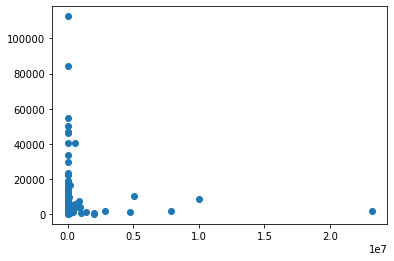

In [242]:
plt.scatter(ND_GDPC_2019['Total Affected'],ND_GDPC_2019['GDPC'] )
plt.show()

TypeError: cannot unpack non-iterable PathCollection object

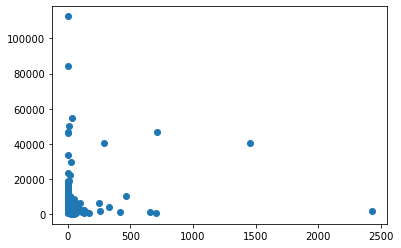

In [259]:
fig, ax = plt.scatter(ND_GDPC_2019['Total Deaths'],ND_GDPC_2019['GDPC'] )
ax.set_xscale("log");
plt.show()

In [244]:
ND_GDPC_10_23 = ND_GDPC[ND_GDPC['Year']>=2010]

In [248]:
ND_GDPC_10_23 = ND_GDPC_10_23.groupby('Country').agg({'Total Deaths': 'sum','Total Affected': 'sum', "Total Damages ('000 US$)": 'sum', 'GDPC':'mean'}) 

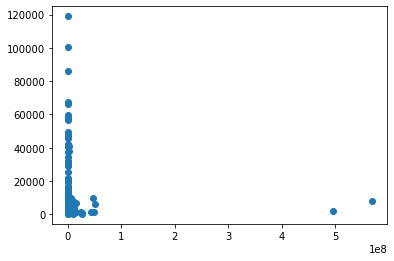

In [249]:
plt.scatter(ND_GDPC_10_23 ['Total Affected'],ND_GDPC_10_23 ['GDPC'] )
plt.show()

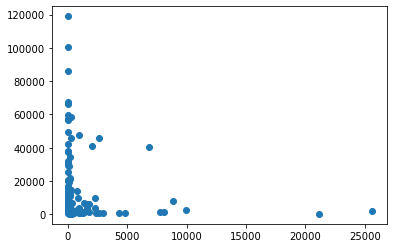

In [252]:
plt.scatter(ND_GDPC_10_23 ['Total Deaths'],ND_GDPC_10_23 ['GDPC'] )
plt.show()

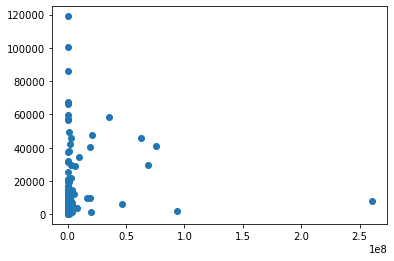

In [253]:
plt.scatter(ND_GDPC_10_23 ["Total Damages ('000 US$)"],ND_GDPC_10_23 ['GDPC'] )
plt.show()

In [250]:
ND_GDPC_10_23['GDPC'].max()

119032.65323057031

In [251]:
ND_GDPC_10_23['Total Affected'].max()

568661311.0

In [254]:
max_affected_idx = ND_GDPC_10_23['Total Affected'].idxmax()
max_affected_row = ND_GDPC_10_23.loc[max_affected_idx]

print(max_affected_row)

Total Deaths                8.830000e+03
Total Affected              5.686613e+08
Total Damages ('000 US$)    2.605880e+08
GDPC                        8.255320e+03
Name: China, dtype: float64


In [257]:
ND_GDPC_10_23.tail()

,Total Deaths,Total Affected,Total Damages ('000 US$),GDPC
Country,,,,
Uruguay,14.0,141393.0,503000.0,16501.802513
Uzbekistan,4.0,70060.0,0.0,1749.655815
Vanuatu,26.0,373041.0,451400.0,2872.793296
Zambia,98.0,3744671.0,0.0,1474.045622
Zimbabwe,1153.0,13442797.0,709000.0,1432.504821
